# DATA612
### PROJECT 2 :Content-Based and Collaborative Filtering
### Ananya 

# COLLABARATIVE FILTERING RECOMMENDATION SYSTEM 

1. collabarative filtering is one of the most popular and simple recemmender
   as, most  attributes such as item feature and all  are not required.
3. It is of two types item based and user based 
4. In item based we will find similarity between items and keep them in one group. Then if a user like a 
   particular item from the similar item group then we recommend  other item in that group to that particular user.
5. Similarly user based we find similarity between uses and form them in a group and if one item is purchased by user 
    then we assumes it's similar user will also like the product.
6. It makes sense when users are similar and dissimilar in nature, However if they are not related then it is difficult to predict .    



In [189]:
import numpy as np 
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split
from surprise import KNNBaseline
from surprise import  accuracy

In [136]:
#  Tacking Toy data to predict rating 
book_data = pd.read_excel(r"book_data.xlsx", encoding = 'unicode_escape',index_col=0 )
book_data = book_data.replace('?',np.nan)
book_data = book_data.values
book_data

array([[ 5., nan,  4., nan,  4.],
       [ 4.,  3.,  5.,  3.,  4.],
       [ 4.,  2., nan, nan,  3.],
       [ 2.,  2.,  3.,  1.,  2.],
       [ 4., nan,  5.,  4.,  5.],
       [ 4.,  2.,  5.,  4.,  4.]])

In [137]:
#creating index for tran and test data
pct_test = 0.2
n_test = int(round(pct_test * np.count_nonzero(~np.isnan(book_data)), 0))
non_na_index = np.argwhere(~np.isnan(book_data))
seq = np.arange(len(non_na_index[:, 0]))
test_index = np.random.choice(seq, n_test, replace = False)
train_index= np.delete(seq, test_index)



In [138]:
#split  data set  into test and train
train = np.copy(book_data)
train[non_na_index[test_index, 0], non_na_index[test_index, 1]] = np.nan
test = np.copy(book_data)
test[non_na_index[train_index, 0], non_na_index[train_index, 1]] = np.nan



In [139]:
train

array([[nan, nan, nan, nan, nan],
       [ 4.,  3.,  5.,  3., nan],
       [ 4., nan, nan, nan,  3.],
       [ 2.,  2.,  3.,  1.,  2.],
       [ 4., nan,  5.,  4.,  5.],
       [ 4.,  2.,  5.,  4.,  4.]])

In [140]:
test

array([[ 5., nan,  4., nan,  4.],
       [nan, nan, nan, nan,  4.],
       [nan,  2., nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]])

In [144]:
train = pd.DataFrame(train,index=['p1','p2','p3','p4','p5','p6'],columns=['B1','B2','B3','B4','B5'])
train.index.name = 'user'
train

,B1,B2,B3,B4,B5
user,,,,,
p1,NaN,NaN,NaN,NaN,NaN
p2,4.0,3.0,5.0,3.0,NaN
p3,4.0,NaN,NaN,NaN,3.0
p4,2.0,2.0,3.0,1.0,2.0
p5,4.0,NaN,5.0,4.0,5.0
p6,4.0,2.0,5.0,4.0,4.0


In [145]:
test = pd.DataFrame(test,index=['p1','p2','p3','p4','p5','p6'],columns=['B1','B2','B3','B4','B5'])
test.index.name = 'user'
test


,B1,B2,B3,B4,B5
user,,,,,
p1,5.0,NaN,4.0,NaN,4.0
p2,NaN,NaN,NaN,NaN,4.0
p3,NaN,2.0,NaN,NaN,NaN
p4,NaN,NaN,NaN,NaN,NaN
p5,NaN,NaN,NaN,NaN,NaN
p6,NaN,NaN,NaN,NaN,NaN


### cosine similarity 

In [146]:
# similarity beyween each user cosine similarity 
train_change = train.fillna(0)
result = cosine_similarity(train_change)
result = pd.DataFrame(result)
result 

,0,1,2,3,4,5
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000000,0.416605,0.888204,0.761979,0.875348
2,0.0,0.416605,1.000000,0.596962,0.684675,0.638179
3,0.0,0.888204,0.596962,1.000000,0.871131,0.947563
4,0.0,0.761979,0.684675,0.871131,1.000000,0.969033
5,0.0,0.875348,0.638179,0.947563,0.969033,1.000000


### Person corelation as it is more robost 

In [147]:
# Pe rson corelation as it is more robost 
test

,B1,B2,B3,B4,B5
user,,,,,
p1,5.0,NaN,4.0,NaN,4.0
p2,NaN,NaN,NaN,NaN,4.0
p3,NaN,2.0,NaN,NaN,NaN
p4,NaN,NaN,NaN,NaN,NaN
p5,NaN,NaN,NaN,NaN,NaN
p6,NaN,NaN,NaN,NaN,NaN


In [148]:
train

,B1,B2,B3,B4,B5
user,,,,,
p1,NaN,NaN,NaN,NaN,NaN
p2,4.0,3.0,5.0,3.0,NaN
p3,4.0,NaN,NaN,NaN,3.0
p4,2.0,2.0,3.0,1.0,2.0
p5,4.0,NaN,5.0,4.0,5.0
p6,4.0,2.0,5.0,4.0,4.0


In [149]:
# finding mean for each user 
mean_row = train.mean(axis =1)
mean_row

user
p1     NaN
p2    3.75
p3    3.50
p4    2.00
p5    4.50
p6    3.80
dtype: float64

In [150]:
result_train = train.subtract(mean_row,axis =0)
result_train

,B1,B2,B3,B4,B5
user,,,,,
p1,NaN,NaN,NaN,NaN,NaN
p2,0.25,-0.75,1.25,-0.75,NaN
p3,0.50,NaN,NaN,NaN,-0.5
p4,0.00,0.00,1.00,-1.00,0.0
p5,-0.50,NaN,0.50,-0.50,0.5
p6,0.20,-1.80,1.20,0.20,0.2


In [151]:
result_train = result_train.fillna(0)
result_train

,B1,B2,B3,B4,B5
user,,,,,
p1,0.00,0.00,0.00,0.00,0.0
p2,0.25,-0.75,1.25,-0.75,0.0
p3,0.50,0.00,0.00,0.00,-0.5
p4,0.00,0.00,1.00,-1.00,0.0
p5,-0.50,0.00,0.50,-0.50,0.5
p6,0.20,-1.80,1.20,0.20,0.2


### balance the neigbour selection we are  filling the diagonal to zero 


In [152]:
cosine_sim = cosine_similarity(result_train)
similarity = np.fill_diagonal(cosine_sim, 0 )
similarity_train = np.around(cosine_sim, decimals=2)

similarity_train

array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.11,  0.85,  0.53,  0.76],
       [ 0.  ,  0.11,  0.  ,  0.  , -0.71,  0.  ],
       [ 0.  ,  0.85,  0.  ,  0.  ,  0.71,  0.32],
       [ 0.  ,  0.53, -0.71,  0.71,  0.  ,  0.23],
       [ 0.  ,  0.76,  0.  ,  0.32,  0.23,  0.  ]])

In [153]:
# converting ot intoa data frame 
similarity_with_user = pd.DataFrame(similarity_train,index=result_train.index)
similarity_with_user.columns=result_train.index
similarity_with_user

user,p1,p2,p3,p4,p5,p6
user,,,,,,
p1,0.0,0.00,0.00,0.00,0.00,0.00
p2,0.0,0.00,0.11,0.85,0.53,0.76
p3,0.0,0.11,0.00,0.00,-0.71,0.00
p4,0.0,0.85,0.00,0.00,0.71,0.32
p5,0.0,0.53,-0.71,0.71,0.00,0.23
p6,0.0,0.76,0.00,0.32,0.23,0.00


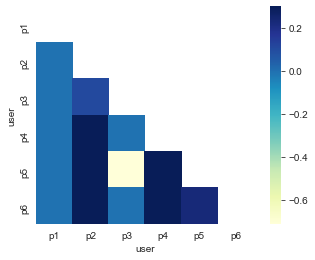

In [154]:
mask = np.zeros_like(similarity_with_user)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(similarity_with_user, mask=mask, vmax=.3, square=True,  cmap="YlGnBu")
    plt.show()

In [155]:
def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [156]:
result_neigh= find_n_neighbours(similarity_with_user,2)
result_neigh

,top1,top2
user,,
p1,p6,p5
p2,p4,p6
p3,p2,p6
p4,p2,p5
p5,p4,p2
p6,p2,p4


In [157]:
def predicted_rating (user,item):
    result = []
    rating = train.loc[user][item] 
    neighbour = result_neigh.loc[user]
    neigh_list = list(neighbour)
    result = []
    for x in neigh_list:
        result.append(train.loc[x][item])
    predicted_rating = np.mean(result)    
    return predicted_rating

### Let us test our model for user 1 and book 5


In [165]:
train.loc['p1']['B5']

nan

In [166]:
predicted_rating ('p1','B5')

4.5

In [167]:
test.loc['p1']['B5']

4.0

### We can see here predicted rating and rating in train data is pretty similar .So, Algorithm is predicting closely as expected .


### Now we will apply it in huge data volume using surprise parakage; I have taken IMDB ratings.csv dataset which has more than 100000 records.

In [188]:
data = pd.read_csv(r'ratings.csv')
data.head()

,userId,movieId,rating,timestamp
0,12882,1,4.0,1147195252
1,12882,32,3.5,1147195307
2,12882,47,5.0,1147195343
3,12882,50,5.0,1147185499
4,12882,110,4.5,1147195239


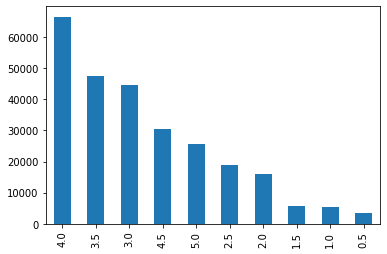

In [190]:
data.rating.value_counts().plot(kind='bar')
plt.show()

In [191]:
data = data[['userId', 'movieId', 'rating', 'timestamp']]

### Removing timestamp column as it is not critical to the business logic

In [192]:
data = data.iloc[:, :-1]
data.head()

,userId,movieId,rating
0,12882,1,4.0
1,12882,32,3.5
2,12882,47,5.0
3,12882,50,5.0
4,12882,110,4.5


In [193]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

### Split the train and test using surprise package

In [194]:

trainset, testset = train_test_split(data, test_size=0.20)

### User based collaborative filtering. user-based=True

In [201]:
# setting k = 30 
sim_options = {'name': 'pearson_baseline',
               'min_support': 5,
               'user_based': True}
base_user = KNNBaseline(k=30,sim_options=sim_options)

In [202]:
base_user .fit(trainset)
base_user_preds = base_user.test(testset)
accuracy.rmse(base_user_preds)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.7778


0.7777656972295978

### Item based collaborative filtering. user_based=False

In [203]:
# setting K value to 30 
sim_options = {'name': 'pearson_baseline',
               'min_support': 5,
               'user_based': False}
base_item_1 = KNNBaseline(k=30,sim_options=sim_options)

In [204]:
base_item_1.fit(trainset)
base_item_1_preds = base_item_1.test(testset)
accuracy.rmse(base_item_1_preds)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.7697


0.7696767214134211

In [199]:
# setting K value to 20 
sim_options = {'name': 'pearson_baseline',
               'min_support': 5,
               'user_based': False}
base_item = KNNBaseline(k=20,sim_options=sim_options)

In [200]:
base_item.fit(trainset)
base_item_preds = base_item.test(testset)
accuracy.rmse(base_item_preds)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.7712


0.7711558285754107

# SUMMARY

### Advantages 
1. As per the above performance, we can see that the efficiency of item and user based  collabative filtering is  similar. However, in  most of the caes item to item colabarative filtering outperform user based.
2. Item are simple to analysis than user as user have mitiple interest and they change in course of time and situations
3. It is very useful as we donot need any type of featur eselection which needs a lot of analysis and tidious task.

### Disadvantages 
1. Enough users need to be in the system other wise leads to cold start problem 
2. sparsity is also an important problem lot of user will not rate lot of items so getting similar user rated a prticular item is difficult. 
2. we cannot suggest a new item as no user has rated it.
3. tend to recommend most popular item.